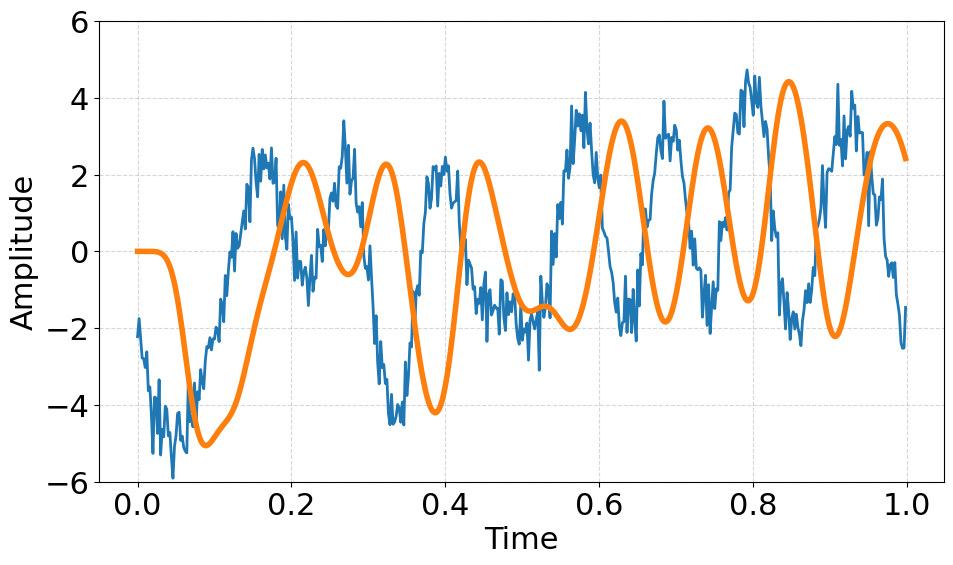

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate a noisy signal
np.random.seed(0)  # for reproducibility
fs = 500
t = np.linspace(0, 1, fs, endpoint=False)  # time points
num_freq = 10  # number of frequencies
freqs = np.linspace(1, 10, num_freq)  # frequencies from 1 Hz to 20 Hz
phases = np.random.uniform(0, 2*np.pi, num_freq)  # random phase offsets
noise_amplitude = 0.5  # amplitude of noise
noise = noise_amplitude * np.random.normal(size=t.size)  # generate noise
original_signal = np.sum([np.sin(2 * np.pi * f * t + phase) for f, phase in zip(freqs, phases)], axis=0)  # sum of sinusoids with different frequencies and phase offsets
noisy_signal = original_signal + noise  # add noise to the signal

# Apply a low-pass filter
cutoff_freq = 20  # cutoff frequency for the low-pass filter
b, a = signal.butter(10, cutoff_freq, 'low', fs=fs)  # Butterworth filter
filtered_signal = signal.lfilter(b, a, noisy_signal)

# Plot the original noisy signal and the filtered signal
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, label='Noisy Signal', linewidth=2)
plt.plot(t, filtered_signal, label='Filtered Signal (Low-pass)', linewidth=4)
plt.xlabel('Time')
plt.ylabel('Amplitude')
#plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()  # adjust layout to prevent clipping of labels
plt.savefig('filtered_signal.png', dpi=300)  # save plot as image
plt.ylim([-6, 6])
plt.show()